In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


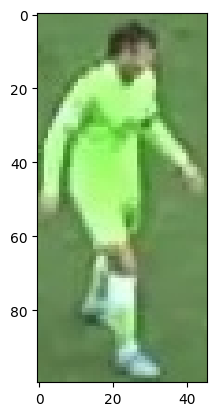

In [3]:
plt.imshow(image)
plt.show()

take the top half of the cropped image of player

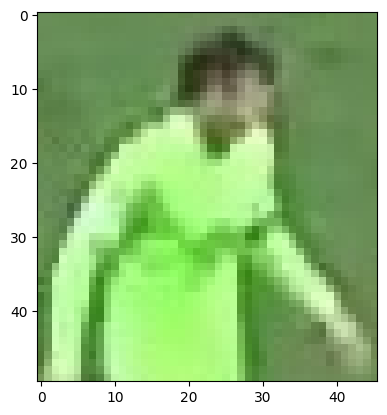

In [4]:
top_half_image = image[0: int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two Clusters


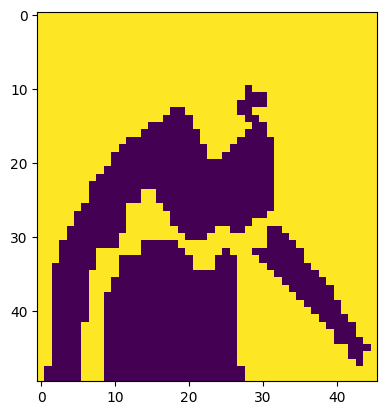

In [12]:
#Reshape the image to 2D array
image_2d = top_half_image.reshape((-1, 3))

#perform k-means clustering
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

#Get the labels and cluster centers
labels = kmeans.labels_

#reshape the labels to the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#Display the clustered image
plt.imshow(clustered_image )
plt.show()

In [13]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_clusters = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_clusters)

1


In [14]:
player_cluster = 1 - non_player_clusters
print(player_cluster)

0


In [15]:
kmeans.cluster_centers_[player_cluster]

array([176.16645649, 242.50441362, 140.57377049])